**Breast Cancer Detection**
![](https://blogs.nvidia.com/wp-content/uploads/2018/01/AI_Mammographie.jpg)

***Domain Background*** : 
	Breast Cancer is the most common type of cancer in woman worldwide accounting for 20% of all cases.
    
>     In 2012 it resulted in 1.68 million new cases and 522,000 deaths.
    
One of the major problems is that women often neglect the symptoms, which could cause more adverse effects on them thus lowering the survival chances. In developed countries, the survival rate is although high, but it is an area of concern in the developing countries where the 5-year survival rates are poor. In India, there are about one million cases every year and the five-year survival of stage IV breast cancer is about 10%. Therefore it is very important to detect the signs as early as possible. 
    
>     Invasive ductal carcinoma (IDC) is the most common form of breast cancer.
   
   About 80% of all breast cancers are invasive ductal carcinomas. Doctors often do the biopsy or a scan if they detect signs of IDC. The cost of testing for breast cancer sets one back with $5000, which is a very big amount for poor families and also manual identification of presence and extent of breast cancer by a pathologist is critical. Therefore automation of detection of breast cancer using Histopathology images could reduce cost and time as well as improve the accuracy of the test. This is an active research field lot of research papers and articles are present online one that I like is -(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5453426/) as they used deep learning approach to study on histology images and achieved the sensitivity of 95 which is greater than many pathologists (~90). This shows the power of automation and how it could help in the detection of breast cancer.



**IMPORT FILES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

**Local Directory**

We explore the name of the directory inside which our datafiles are present.

In [2]:
print(os.listdir("../input")) #to check the name of the directory inside which we have our files

['IDC_regular_ps50_idx5']


**Data Exploration**


In data exploration we will first check the name of the files.

In [3]:
from glob import glob #glob is used to extract the files from a particular folder
files = glob('../input/IDC_regular_ps50_idx5/**/*', recursive=True) 

In [4]:
print(files[0]) 

../input/IDC_regular_ps50_idx5/13666


In [5]:
extention=list() #will store end 3 letters of all the file names (extentions)
for image in files:
    ext=image[-3:]
    if ext not in extention:
        extention.append(ext)
alpha_ext=list()
for ex in extention: #any valid image will have extention in alphabets 
    if ex.isalpha() == True: #this line checks for such alphabet extentions
        alpha_ext.append(ex)
print(alpha_ext)

['png']


> **Code Conclusion :**  There are only png extentions which are present in alphabets therefore it means that we have only one image extention files with *.png* extentions. Therefore we will load only that.

In [6]:
from glob import glob
Data = glob('../input/IDC_regular_ps50_idx5/**/*.png', recursive=True)  #we extract only png files

In [7]:
del(files) #We don't need the files variable , so delete it.
print(len(Data))

277524


> **Code Conclusion **: We have total of 277524 image files

Next Step is that we will check whether the dimentions of all the images are same or different

In [8]:

from PIL import Image #adds support for opening, manipulating, and saving many different image file formats
from tqdm import tqdm #adds progress bar for the loops
dimentions=list()
x=1
for images in (Data):
    dim = Image.open(images)
    size= dim.size
    if size not in dimentions:
        dimentions.append(size)
        x+=1
    if(x>3): #going through all the images will take up lot of memory, so therefore we will check until we get three different dimentions.
        break
print(dimentions)


[(50, 50), (50, 38), (50, 49)]


> ***Code Conclusion : *** We can see that the dimentions of images are not equal therefore we would make it all equal  to work bettter with our network.

***Data Extraction and Visualization***

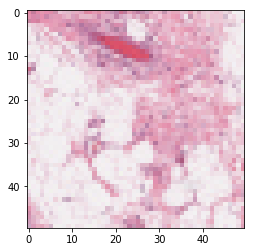

In [9]:
import cv2 #used for computer vision tasks such as reading image from file, changing color channels etc
import matplotlib.pyplot as plt #for plotting various graph, images etc.
def view_images(image): #function to view an image
    image_cv = cv2.imread(image) #reads an image
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)); #displays an image
view_images(Data[52])

> ***Code Conclusion :*** We can see that images are very small, though they are cropped images, its hard for human eye to understand them without using some high costly machines. 

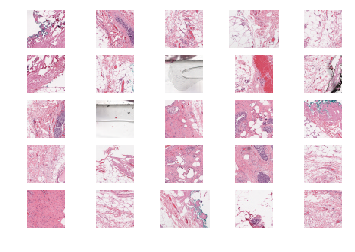

In [10]:
def plot_images(photos) : #to plot multiple image
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

Now lets look at the color ranges that our images have

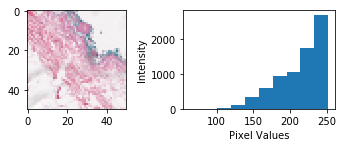

In [11]:
def hist_plot(image): #to plot histogram of pixel values present in an image VS intensities
    img = cv2.imread(image)
    plt.subplot(2, 2,1)
    view_images(image)
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
hist_plot(Data[29])
    

> ***Code Conclusion :*** From the above image we can conclude that brighter region is more than the darken region in our image.  

Next step is we need to extract the class names in which each files belong from its file names. We will save it in output.csv file.

In [12]:
from tqdm import tqdm
import csv #to open and write csv files
Data_output=list()
Data_output.append(["Classes"])
for file_name in tqdm(Data):
    Data_output.append([file_name[-10:-4]])
with open("output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])

100%|██████████| 277524/277524 [00:00<00:00, 568200.47it/s]


Below code reads the data from output.csv and displays it

In [13]:
from IPython.display import display # Allows the use of display() for DataFrames
data_output = pd.read_csv("output.csv")
display(data_output.head(5))
print(data_output.shape)

,Classes
0,class0
1,class0
2,class0
3,class0
4,class0


(277524, 1)


> *Class1* represents** IDC(+)** and* Class0* represents** IDC(-)**

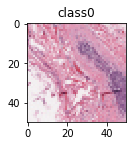

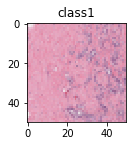

In [14]:
def class_output(images,x,i):  #to display image along with their labels
    fig = plt.figure()
    ax = plt.subplot(2, 2,i)
    ax.set_title(data_output.loc[x].item())
    view_images(images)
    i+=1
    return
k=0 #we have to show only one image of class0 therefore this variable is to check that
l=0 #we have to show only one image of class1 therefore this variable to check that
i=0 #for subplot position
for x in range(1,len(Data)):
    if(data_output.loc[x].item()=="class0" and k!=1):
        k+=1
        i+=1
        class_output(Data[x],x,i)
    elif(data_output.loc[x].item()=="class1" and l!=1):
        l+=1
        i+=1
        class_output(Data[x],x,i)
    elif(k==0 or l==0):
        continue
    else:
        break

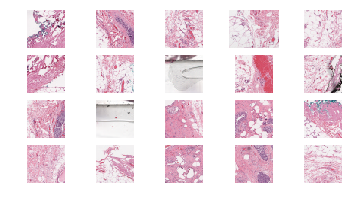

In [15]:
def vis_data(photos,a) :
    x=0
    beta=0
    for image in photos:
        image_cv = cv2.imread(image)
        fig=plt.figure(figsize=(50,50))
        ax=plt.subplot(2, 5, x+1)
        view_images(images)
        x+=1
        beta+=1
plot_images(Data[0:20])

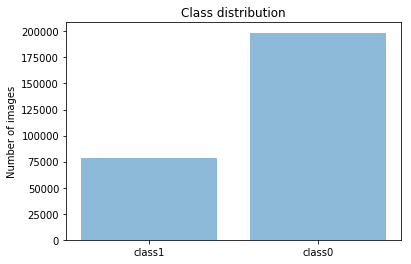

In [16]:
class1 = data_output[(data_output["Classes"]=="class1" )].shape[0]
class0 = data_output[(data_output["Classes"]=="class0" )].shape[0]
objects=["class1","class0"]
y_pos = np.arange(len(objects))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()

> ***Code Conclusion :*** We can see that we have an unbalanced class and which is a common problem when we have medical data, therefore this is one another problem that we have to deal with later.

In [17]:
percent_class1=class1/len(Data)
percent_class0=class0/len(Data)
print("Total Class1 images :",class1)
print("Total Class0 images :",class0)
print("Percent of class 0 images : ", percent_class0*100)
print("Percent of class 1 images : ", percent_class1*100)

Total Class1 images : 78786
Total Class0 images : 198738
Percent of class 0 images :  71.61110390452717
Percent of class 1 images :  28.388896095472827


> ***Data Processing  *** 

We will first shuffle are images to remove any patterns if present and then load them.

In [18]:
from sklearn.utils import shuffle #to shuffle the data
Data,data_output= shuffle(Data,data_output)

In [19]:
from tqdm import tqdm
data=list()
for img in tqdm(Data):
    image_ar = cv2.imread(img)
    data.append(cv2.resize(image_ar,(50,50),interpolation=cv2.INTER_CUBIC))

100%|██████████| 277524/277524 [04:52<00:00, 949.52it/s] 


We would encode our output data which is present as Class1 and Class0 to 1 and 0.

In [20]:
data_output=data_output.replace(to_replace="class0",value=0)
data_output=data_output.replace(to_replace="class1",value=1)

In the next step we will OneHot encode our data to better work with neural networks.

In [21]:
from keras.utils import to_categorical #to hot encode the output labels
data_output_encoded =to_categorical(data_output, num_classes=2)
print(data_output_encoded.shape)

Using TensorFlow backend.


(277524, 2)


Now we will split our data into training set and testing set.

In [22]:
from sklearn.model_selection import train_test_split
data=np.array(data)
X_train, X_test, Y_train, Y_test = train_test_split(data, data_output_encoded, test_size=0.3)
print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 194266
Number of test files 83258
Number of train_target files 194266
Number of  test_target  files 83258


We have a large dataset and we will work with neural networks, therefore for better debugging we will use only a part of data, considering limited RAM and non GPU processor, this will not cost us much as we would also be using under sampling methods and image argumentation to deal with class imbalances and moderate data.

In [23]:
X_train=X_train[0:70000]
Y_train=Y_train[0:70000]
X_test=X_test[0:30000]
Y_test=Y_test[0:30000]

We will now do undersampling, to treat our data for class imbalances. The Code inspiration is taken from a notebook - https://www.kaggle.com/paultimothymooney/predict-idc-in-breast-cancer-histology-images

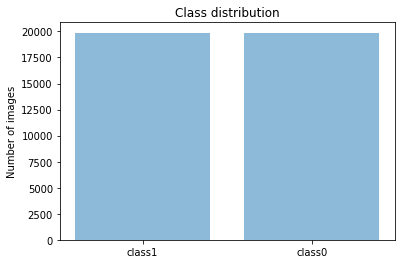

In [24]:
from keras.utils import to_categorical #to hot encode the data
from imblearn.under_sampling import RandomUnderSampler #For performing undersampling

X_train_shape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_shape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_Flat = X_train.reshape(X_train.shape[0], X_train_shape)
X_test_Flat = X_test.reshape(X_test.shape[0], X_test_shape)

random_US = RandomUnderSampler(ratio='auto') #Constructor of the class to perform undersampling
X_train_RUS, Y_train_RUS = random_US.fit_sample(X_train_Flat, Y_train) #resamples the dataset
X_test_RUS, Y_test_RUS = random_US.fit_sample(X_test_Flat, Y_test) #resamples the dataset
del(X_train_Flat,X_test_Flat)

class1=1
class0=0

for i in range(0,len(Y_train_RUS)): 
    if(Y_train_RUS[i]==1):
        class1+=1
for i in range(0,len(Y_train_RUS)): 
    if(Y_train_RUS[i]==0):
        class0+=1
#For Plotting the distribution of classes
classes=["class1","class0"]
y_pos = np.arange(len(classes))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()


#hot encoding them
Y_train_encoded = to_categorical(Y_train_RUS, num_classes = 2)
Y_test_encoded = to_categorical(Y_test_RUS, num_classes = 2)

del(Y_train_RUS,Y_test_RUS)

for i in range(len(X_train_RUS)):
    X_train_RUS_Reshaped = X_train_RUS.reshape(len(X_train_RUS),50,50,3)
del(X_train_RUS)

for i in range(len(X_test_RUS)):
    X_test_RUS_Reshaped = X_test_RUS.reshape(len(X_test_RUS),50,50,3)
del(X_test_RUS)


We also need a validation set inorder to check overfitting. We can do two things either split test set further into valid set or split train se into valid set.

We will go for spliting testing set into validation set.

In [25]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test_RUS_Reshaped, Y_test_encoded, test_size=0.2,shuffle=True)

In [26]:
print("Number of train files",len(X_train_RUS_Reshaped))
print("Number of valid files",len(X_valid))
print("Number of train_target files",len(Y_train_encoded))
print("Number of  valid_target  files",len(Y_valid))
print("Number of test files",len(X_test))
print("Number of  test_target  files",len(Y_test))

Number of train files 39754
Number of valid files 3378
Number of train_target files 39754
Number of  valid_target  files 3378
Number of test files 13508
Number of  test_target  files 13508


In [27]:
from sklearn.utils import shuffle
X_train,Y_train= shuffle(X_train_RUS_Reshaped,Y_train_encoded)

> We need to now preprocess our image file. We change pixels range from 0-255 to 0-1.

In [28]:
display(Y_train_encoded.shape)
display(Y_test.shape)
display(Y_valid.shape)

(39754, 2)

(13508, 2)

(3378, 2)

In [29]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_valid.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Label Data Shape:", Y_train.shape)
print("Validation Label Data Shape:", Y_valid.shape)
print("Testing Label Data Shape:", Y_test.shape)

Training Data Shape: (39754, 50, 50, 3)
Validation Data Shape: (3378, 50, 50, 3)
Testing Data Shape: (13508, 50, 50, 3)
Training Label Data Shape: (39754, 2)
Validation Label Data Shape: (3378, 2)
Testing Label Data Shape: (13508, 2)


Now we have our three sets of train, valid and test. We will now create our benchmark model.

In [30]:
import itertools #create iterators for effective looping
#Plotting the confusion matrix for checking the accuracy of the model
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

> ***BENCHMARK MODEL: *** A simple CNN model

In [31]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D #Import layers for the model
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential #Our model will be Sequential

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(50,50,3)))
model.add(Flatten()) #Flattens the matrix into a vector
model.add(Dense(2, activation='softmax')) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 40002     
Total params: 40,898
Trainable params: 40,898
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy']) #Compiling the model

In [33]:
from keras.callbacks import ModelCheckpoint  #Checkpoint to save the best weights of the model.
checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True) 
model.fit(X_train, Y_train, 
          validation_data=(X_valid, Y_valid),
          epochs=3, batch_size=128, callbacks=[checkpointer], verbose=2,shuffle=True)

Train on 39754 samples, validate on 3378 samples
Epoch 1/3
 - 5s - loss: 8.0543 - acc: 0.4997 - val_loss: 8.0972 - val_acc: 0.4976

Epoch 00001: val_loss improved from inf to 8.09722, saving model to weights.best.cnn.hdf5
Epoch 2/3
 - 3s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0972 - val_acc: 0.4976

Epoch 00002: val_loss did not improve from 8.09722
Epoch 3/3
 - 3s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0972 - val_acc: 0.4976

Epoch 00003: val_loss did not improve from 8.09722


In [34]:
model.load_weights('weights.best.cnn.hdf5') #Load the saved weights from file.

In [35]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████| 13508/13508 [00:17<00:00, 761.02it/s]


> ***Now we will plot the confusion matrix :***

[[   0 6746]
 [   0 6762]]


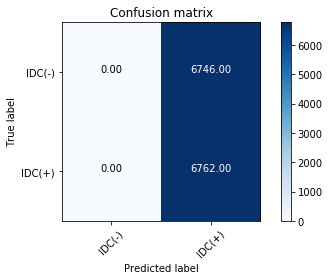

In [36]:
from sklearn.metrics import confusion_matrix #to plot confusion matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_bench=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions))
plot_confusion_matrix(cnf_matrix_bench, classes=class_names,
                      title='Confusion matrix')


***Image Argumentation***

We will now add image argumentation to our data, so that it may be set for wider range of domain

We will also rescale our image pixels, from range of 0-255.0 to 0-1.

In [37]:
from keras.preprocessing.image import ImageDataGenerator  #For Image argumentaton
datagen = ImageDataGenerator(
        shear_range=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        rescale=1/255.0,
        horizontal_flip=True,
        vertical_flip=True)

In [38]:
X_valid_e=X_valid/255.0 #rescaling X_valid
X_test_e=X_test/255.0 #rescaling X_Test

In [39]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

argum_model = Sequential()
argum_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=X_train.shape[1:]))
argum_model.add(Dropout(0.15))
argum_model.add(MaxPooling2D(pool_size=2,strides=2))
argum_model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(Dropout(0.25))
argum_model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(Dropout(0.35))
argum_model.add(Conv2D(filters=512,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(Dropout(0.45))
argum_model.add(Flatten())
argum_model.add(Dense(2, activation='softmax'))
argum_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 128)         0         
__________

In [40]:
argum_model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])

In [41]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.bestarg.hdf5', verbose=1, save_best_only=True)

In [42]:
batch_size=32
epochs=20
argum_model.fit_generator(datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=len(X_train) / batch_size,
          epochs=epochs,callbacks=[checkpointer], verbose=0)


Epoch 00001: val_loss improved from inf to 0.45272, saving model to weights.bestarg.hdf5

Epoch 00002: val_loss improved from 0.45272 to 0.42476, saving model to weights.bestarg.hdf5

Epoch 00003: val_loss improved from 0.42476 to 0.41783, saving model to weights.bestarg.hdf5

Epoch 00004: val_loss did not improve from 0.41783

Epoch 00005: val_loss did not improve from 0.41783

Epoch 00006: val_loss did not improve from 0.41783

Epoch 00007: val_loss did not improve from 0.41783

Epoch 00008: val_loss did not improve from 0.41783

Epoch 00009: val_loss improved from 0.41783 to 0.39494, saving model to weights.bestarg.hdf5

Epoch 00010: val_loss improved from 0.39494 to 0.39043, saving model to weights.bestarg.hdf5

Epoch 00011: val_loss did not improve from 0.39043

Epoch 00012: val_loss improved from 0.39043 to 0.38806, saving model to weights.bestarg.hdf5

Epoch 00013: val_loss did not improve from 0.38806

Epoch 00014: val_loss did not improve from 0.38806

Epoch 00015: val_loss d

In [43]:
batch_size=64
epochs=5
argum_model.fit_generator(datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=len(X_train) / batch_size,
          epochs=epochs,callbacks=[checkpointer], verbose=0)


Epoch 00001: val_loss did not improve from 0.37917

Epoch 00002: val_loss improved from 0.37917 to 0.37009, saving model to weights.bestarg.hdf5

Epoch 00003: val_loss improved from 0.37009 to 0.36978, saving model to weights.bestarg.hdf5

Epoch 00004: val_loss did not improve from 0.36978

Epoch 00005: val_loss did not improve from 0.36978


In [44]:
argum_model.load_weights('weights.bestarg.hdf5')

In [45]:
predictions_arg = [np.argmax(argum_model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_e)]

100%|██████████| 13508/13508 [00:30<00:00, 445.76it/s]


> ***Now we will plot the confusion matrix :***

[[5752  994]
 [1058 5704]]


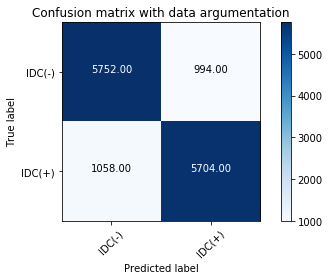

In [46]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_arg))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix with data argumentation')

**Transfer Learning**

We will now add transfer learning from various models

In [47]:
from keras.applications.vgg19 import VGG19 #downloading model for transfer learning
arg_model = VGG19(include_top=False,weights='imagenet',input_shape=(50,50,3))

In [48]:
from keras.applications.vgg19 import preprocess_input #preprocessing the input so that it could work with the downloaded model
bottleneck_train=arg_model.predict(preprocess_input(X_train),batch_size=50,verbose=1) #calculating bottleneck features, this inshure that we hold the weights of bottom layers

39754/39754 [==============================] - 42s 1ms/step


In [49]:
from keras.applications.vgg19 import preprocess_input
bottleneck_valid=arg_model.predict(preprocess_input(X_valid),batch_size=50,verbose=1)

3378/3378 [==============================] - 4s 1ms/step


In [50]:
from keras.applications.vgg19 import preprocess_input
bottleneck_test=arg_model.predict(preprocess_input(X_test),batch_size=50,verbose=1)

13508/13508 [==============================] - 14s 1ms/step


In [51]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=bottleneck_train.shape[1:]))
model_transfer.add(Dense(32,activation='relu'))
model_transfer.add(Dropout(0.15))
model_transfer.add(Dense(64,activation='relu'))
model_transfer.add(Dropout(0.20))
model_transfer.add(Dense(128,activation='relu'))
model_transfer.add(Dropout(0.25))
model_transfer.add(Dense(256,activation='relu'))
model_transfer.add(Dropout(0.35))
model_transfer.add(Dense(512,activation='relu'))
model_transfer.add(Dropout(0.45))

model_transfer.add(Dense(2, activation='softmax'))

model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

In [52]:
model_transfer.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])

In [53]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.bestarg.tranfer.hdf5', verbose=1, save_best_only=True)

In [54]:
batch_size=32
epochs=20
model_transfer.fit(bottleneck_train, Y_train, batch_size,
          validation_data=(bottleneck_valid, Y_valid),
          epochs=epochs,callbacks=[checkpointer], verbose=1)

Train on 39754 samples, validate on 3378 samples
Epoch 1/20
39754/39754 [==============================] - 10s 255us/step - loss: 0.5356 - acc: 0.7564 - val_loss: 0.4856 - val_acc: 0.7904

Epoch 00001: val_loss improved from inf to 0.48556, saving model to weights.bestarg.tranfer.hdf5
Epoch 2/20
39754/39754 [==============================] - 10s 240us/step - loss: 0.4741 - acc: 0.7924 - val_loss: 0.4545 - val_acc: 0.7880

Epoch 00002: val_loss improved from 0.48556 to 0.45453, saving model to weights.bestarg.tranfer.hdf5
Epoch 3/20
39754/39754 [==============================] - 10s 240us/step - loss: 0.4638 - acc: 0.7975 - val_loss: 0.4695 - val_acc: 0.7963

Epoch 00003: val_loss did not improve from 0.45453
Epoch 4/20
39754/39754 [==============================] - 10s 240us/step - loss: 0.4570 - acc: 0.8010 - val_loss: 0.4575 - val_acc: 0.8011

Epoch 00004: val_loss did not improve from 0.45453
Epoch 5/20
39754/39754 [==============================] - 9s 238us/step - loss: 0.4530 - ac

In [55]:
model_transfer.load_weights('weights.bestarg.tranfer.hdf5')

In [56]:
predictions_transfer = [np.argmax(model_transfer.predict(np.expand_dims(feature, axis=0))) for feature in bottleneck_test]

> ***Now we will plot the confusion matrix :***

[[5707 1039]
 [1657 5105]]


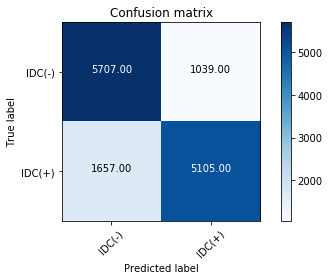

In [57]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_transfer=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_transfer))
plot_confusion_matrix(cnf_matrix_transfer, classes=class_names,
                      title='Confusion matrix')

Comparision is made between three algorithms with repect to false positives and false negatives. As considering dealing with cancer , the algorithm must give less false negative, at its a matter of death and life.

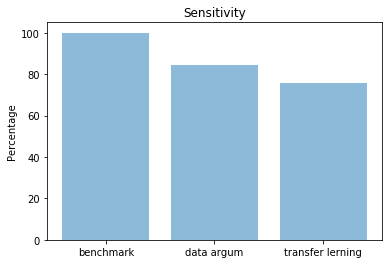

In [58]:
#Bar chart to compare different models
tp=0
for i in range(0,len(Y_test)): #Number of positive cases
    if(np.argmax(Y_test[i])==1):
        tp+=1
#Senstivity of models
confusion_bench_s=cnf_matrix_bench[1][1]/tp *100 
confusion_Arg_s=cnf_matrix_Arg[1][1]/tp *100
confusion_transfer_s=cnf_matrix_transfer[1][1]/tp *100

classes=["benchmark","data argum","transfer lerning"]
objects=["benchmark","data argum","transfer lerning"]
y_pos = np.arange(len(classes))
count=[confusion_bench_s,confusion_Arg_s,confusion_transfer_s]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Sensitivity')

plt.show()


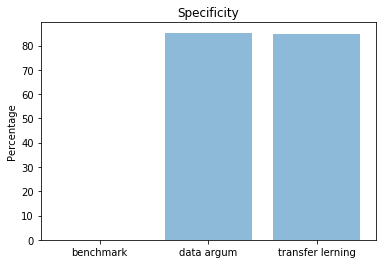

In [59]:
tp=0
tn=0
for i in range(0,len(Y_test)):  #Number of postive cases
    if(np.argmax(Y_test[i])==1): 
        tp+=1
for i in range(0,len(Y_test)): #number of negative cases
    if(np.argmax(Y_test[i])==0):
        tn+=1
confusion_bench=cnf_matrix_bench[0][0]/tn *100
confusion_Arg=cnf_matrix_Arg[0][0]/tn *100
confusion_transfer=cnf_matrix_transfer[0][0]/tn *100
classes=["benchmark","data argum","transfer lerning"]
objects=["benchmark","data argum","transfer lerning"]
y_pos = np.arange(len(classes))
count=[confusion_bench,confusion_Arg,confusion_transfer]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Specificity')

plt.show()


> Result : We can see that tranfer learning and image argumentation both are doing a great job, they both have senstivity and specificity o about 0.8.

In [60]:
col=['Models','Senstivity','Specificity']
results=pd.DataFrame(columns=col) #dataframe to store the results
results.loc[0]=['Bench',confusion_bench_s,confusion_bench]
results.loc[1]=['Image Arg model',confusion_Arg_s,confusion_Arg]
results.loc[2]=['Transfer Learning model',confusion_transfer_s,confusion_transfer]

In [61]:
display(results)

,Models,Senstivity,Specificity
0,Bench,100.000000,0.000000
1,Image Arg model,84.353741,85.265342
2,Transfer Learning model,75.495416,84.598280


> **Robustness of the Model**

To check the robustness of the model we would perform K Fold CV on the dataset and if the validation socre on each fold does nt change much we can say that the model i robust

In [62]:
X=np.array(data[0:100000]).astype('float32')/255
print(X.shape[1:])

(50, 50, 3)


In [63]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
def create_network(): #Function to create a network
    argum_model = Sequential()
    argum_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=X.shape[1:]))
    argum_model.add(Dropout(0.15))
    argum_model.add(MaxPooling2D(pool_size=2,strides=2))
    argum_model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
    argum_model.add(Dropout(0.25))
    argum_model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
    argum_model.add(Dropout(0.35))
    argum_model.add(Conv2D(filters=512,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
    argum_model.add(Dropout(0.45))
    argum_model.add(Flatten())
    argum_model.add(Dense(2, activation='softmax'))
    argum_model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])
    return argum_model

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
cnn = KerasClassifier(build_fn=create_network,  #Keras classifier to mak it work with sklearn
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

In [65]:

cross_val_score(cnn, X, data_output_encoded[0:100000], cv=5) #K-Fold cross validation

array([0.85985, 0.8545 , 0.84025, 0.84905, 0.85525])

>** Code Conclusion :** 5-Fold Cross Validations is performed and as we can see that the difference in validation score is near about 0.01 , which is very small therefore we can say that our model is robust.

Algorithm for passing a new image and predicting whether it has breast cancer or not.

In [66]:
def predict(image):
    predictions_im = [np.argmax(argum_model.predict(np.expand_dims(image,axis=0)))]
    if(predictions_im==1):
        print('IDC DETECTED ')
    else:
        print('IDC Negative')

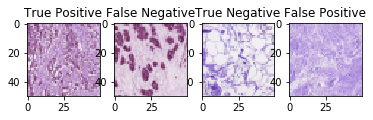

In [67]:
a=0
b=0
c=0
d=0
for i in range(len(X_train)):
    if(np.argmax(Y_train[i])==1 and predictions_arg[i]==1 and a==0):
        a+=1
        img = Image.fromarray(X_train[i])
        ax=plt.subplot(2, 4, 1)
        ax.set_title('True Positive')
        plt.imshow(img)
        
    elif(np.argmax(Y_train[i])==1 and predictions_arg[i]==0 and b==0):
        b+=1
        img = Image.fromarray(X_train[i])
        ax1=plt.subplot(2, 4, 2)
        ax1.set_title('False Negative')
        plt.imshow(img)
    elif(np.argmax(Y_train[i])==0 and predictions_arg[i]==0 and c==0):
        c+=1
        img = Image.fromarray(X_train[i])
        ax2=plt.subplot(2, 4, 3)
        ax2.set_title('True Negative')
        plt.imshow(img)
    elif(np.argmax(Y_train[i])==0 and predictions_arg[i]==1 and d==0):
        d+=1
        img = Image.fromarray(X_train[i])
        ax3=plt.subplot(2, 4, 4)
        ax3.set_title('False Positive')
        plt.imshow(img)
    elif(a>0 and b>0 and c>0 and d>0):
        break
        

IDC Negative
Actual :  ['IDC+']


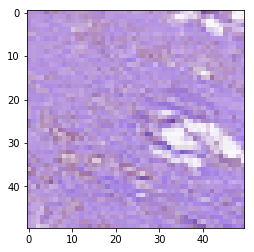

In [70]:
predict(X_train[820])
img = Image.fromarray(X_train[820])
class_a=['IDC+' if np.argmax(Y_train[820])==1 else 'IDC-']
print('Actual : ',class_a)
plt.imshow(img)

IDC Negative
Actual :  ['IDC-']


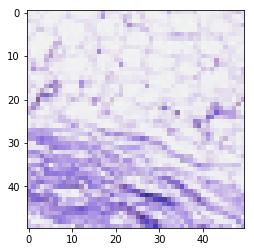

In [69]:
predict(X_train[10])
img = Image.fromarray(X_train[10])
class_a=['IDC+' if np.argmax(Y_train[10])==1 else 'IDC-']
print('Actual : ',class_a)
plt.imshow(img)